# 正規分布

In [3]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
set_plot_params()
name = Path().cwd().name + "/normal"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


# PDF

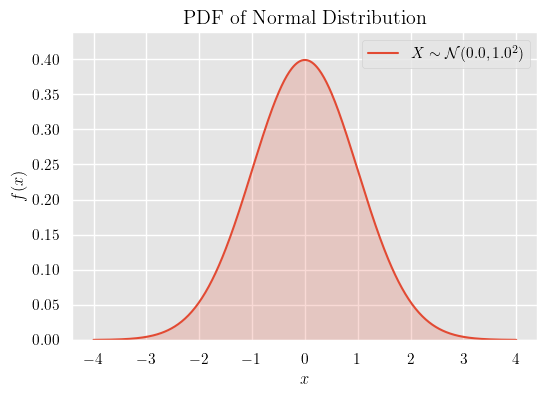

In [4]:
# 正規分布 N(μ, σ^2)
mu, sigma = 0.0, 1.0

# x の範囲（±4σ）
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

# 正規分布の確率密度関数
pdf = (1.0 / (np.sqrt(2*np.pi) * sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# プロット
plt.figure(figsize=(6,4))
plt.plot(x, pdf, label=rf"$X \sim \mathcal{{N}}({mu},{sigma}^2)$")
plt.fill_between(x, pdf, alpha=0.2)

plt.title("PDF of Normal Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.ylim(0, 1.1 * (1.0 / (np.sqrt(2*np.pi) * sigma)))  # ピークに合わせて上限調整
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("pdf.png"), dpi=300, bbox_inches="tight")
plt.show()


In [5]:
from matplotlib.animation import FuncAnimation, PillowWriter

# 正規分布 N(μ, σ^2) をアニメーション（σを変化）
mu = 0.0
sigmas = np.linspace(0.5, 2.0, 40)  # フレームごとの σ
x = np.linspace(mu - 8, mu + 8, 600)  # 最大σ=2 を想定して ±4σ

def normal_pdf(x, mu, sigma):
    return (1.0 / (np.sqrt(2*np.pi) * sigma)) * np.exp(-0.5 * ((x - mu)/sigma)**2)

fig, ax = plt.subplots(figsize=(6,4))
line, = ax.plot([], [], color="blue")
fill = [None]

ax.set_xlim(x.min(), x.max())
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.set_title("PDF of Normal Distribution")

def init():
    line.set_data([], [])
    return line,

def update(sigma):
    # 前の塗りつぶしを消す
    if fill[0] is not None:
        fill[0].remove()

    pdf = normal_pdf(x, mu, sigma)
    line.set_data(x, pdf)
    fill[0] = ax.fill_between(x, pdf, alpha=0.3, color="blue")

    # y上限はピークに合わせて都度調整
    peak = 1.0 / (np.sqrt(2*np.pi) * sigma)
    ax.set_ylim(0, 1.1 * peak)

    ax.set_title(rf"$X \sim \mathcal{{N}}({mu:.1f},\, {sigma:.2f}^2)$")
    return line, fill[0]

ani = FuncAnimation(fig, update, frames=sigmas, init_func=init, blit=False, interval=200)

# GIF保存
ani.save(save_dir.joinpath("pdf.gif"), writer=PillowWriter(fps=5))
plt.close()


# CDF

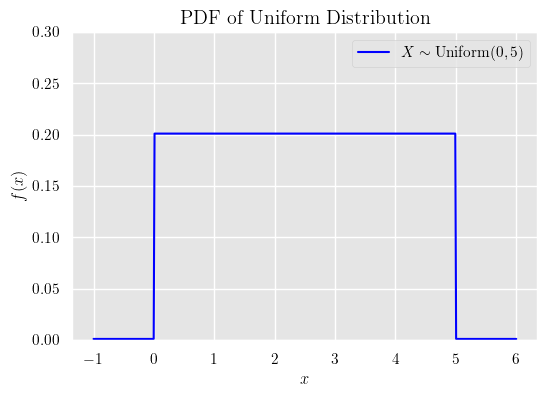

In [3]:
# 区間 [a, b]
a, b = 0, 5

# x の範囲
x = np.linspace(-1, 6, 500)

# 一様分布の確率密度関数
pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)

# plot
plt.figure(figsize=(6,4))
plt.plot(x, pdf+0.001, label=rf"$X \sim \mathrm{{Uniform}}({a},{b})$", color="blue")
# plt.fill_between(x, pdf, alpha=0.2, color="blue")

plt.title("PDF of Uniform Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.ylim(0, 0.3)
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("pdf.png"), dpi=300)
plt.show()


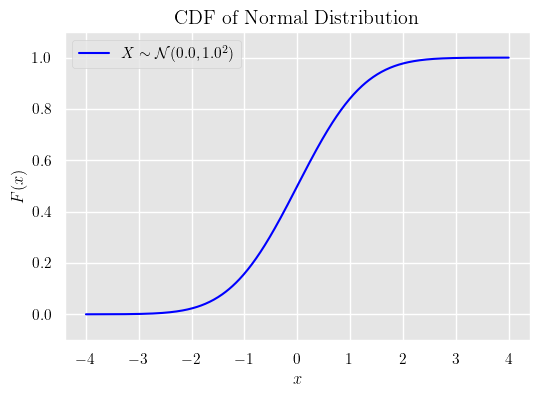

In [7]:
from math import erf, sqrt

# 正規分布 N(μ, σ^2)
mu, sigma = 0.0, 1.0

# x の範囲（±4σ）
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

# 累積分布関数（math.erf を使用）
z = (x - mu) / (sigma * sqrt(2))
cdf = 0.5 * (1 + np.vectorize(erf)(z))

# plot
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, label=rf"$X \sim \mathcal{{N}}({mu},{sigma}^2)$", color="blue")
plt.title("CDF of Normal Distribution")
plt.xlabel(r"$x$")
plt.ylabel(r"$F(x)$")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.savefig(save_dir.joinpath("cdf.png"), dpi=300, bbox_inches="tight")
plt.show()
